In [1]:
rm -r -f Q6_Dataset

In [2]:
!unzip Q6_Dataset.zip

Archive:  Q6_Dataset.zip
   creating: Q6_Dataset/
   creating: Q6_Dataset/Images/
  inflating: Q6_Dataset/Images/1.jpg  
  inflating: Q6_Dataset/Images/c1.jpg  
  inflating: Q6_Dataset/Images/c10.jpg  
  inflating: Q6_Dataset/Images/c11.jpg  
  inflating: Q6_Dataset/Images/c12.jpg  
  inflating: Q6_Dataset/Images/c13.jpg  
  inflating: Q6_Dataset/Images/c14.jpg  
  inflating: Q6_Dataset/Images/c15.jpg  
  inflating: Q6_Dataset/Images/c16.jpg  
  inflating: Q6_Dataset/Images/c17.jpg  
  inflating: Q6_Dataset/Images/c18.jpg  
  inflating: Q6_Dataset/Images/c19.jpg  
  inflating: Q6_Dataset/Images/c2.jpg  
  inflating: Q6_Dataset/Images/c20.jpg  
  inflating: Q6_Dataset/Images/c21.jpg  
  inflating: Q6_Dataset/Images/c22.jpg  
  inflating: Q6_Dataset/Images/c23.jpg  
  inflating: Q6_Dataset/Images/c24.jpg  
  inflating: Q6_Dataset/Images/c25.jpg  
  inflating: Q6_Dataset/Images/c26.jpg  
  inflating: Q6_Dataset/Images/c27.jpg  
  inflating: Q6_Dataset/Images/c28.jpg  
  inflating: Q6_Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###correct some label

In [4]:
import os

#m 67 c 67

base_path = "Q6_Dataset/Images/" 

rename_map = {'1.jpg' : 'm66.jpg',
              'ManUtd-508878051576073641743_medium.jpg' : 'm65.jpg',
              'images.jpg' : 'm64.jpg',
              'index.jpg' : 'c66.jpg',
              }

for i in rename_map.keys():
  os.rename(base_path + i, base_path + rename_map[i])

### convert images to numbers

In [5]:
import glob
import ntpath
import cv2

def image_avr(name):
  myimg = cv2.imread(name)
  avg_color_per_row = np.average(myimg, axis=0)
  avg_color = np.average(avg_color_per_row, axis=0)
  return avg_color.tolist()

def read_dataset(base_path):
  label_map = {'m' : 0, 'c' : 1}

  file_path = glob.glob(base_path + "*")
  file_names = [ntpath.basename(i) for i in file_path]

  x_data = []
  y_data = []

  for i in file_path:
    print(ntpath.basename(i))
    y_data.append(label_map[ntpath.basename(i)[0]])
    print(y_data[-1])
    x_data.append(image_avr(i))
    print(x_data[-1])

  return x_data, y_data

x_data, y_data = read_dataset(base_path)

c18.jpg
1
[100.30676170676173, 99.31917631917632, 93.17457677457674]
m42.jpg
0
[60.077180273056534, 69.6492457111014, 95.05445209568916]
m9.jpg
0
[95.79878534448426, 88.44030266825956, 83.9925129430506]
c52.jpg
1
[125.87394724847921, 118.47599231119835, 115.98194716921309]
m27.jpg
0
[55.83084507882233, 58.78019203626026, 99.18927300558614]
m4.jpg
0
[73.55049603174608, 91.77755952380953, 108.52468253968257]
c21.jpg
1
[134.94046056556496, 107.88261146243484, 121.57805353378657]
m59.jpg
0
[44.53021771027479, 51.89808462545105, 83.14958163143919]
c30.jpg
1
[51.08191955396255, 47.85688968538429, 53.733671843886896]
c57.jpg
1
[75.06264422694358, 57.74148563698577, 65.60008355216038]
c56.jpg
1
[74.56966658709314, 64.54541656719987, 65.1199570303175]
m22.jpg
0
[47.16936475816368, 59.54842677459035, 127.53517438400183]
m64.jpg
0
[71.20783753768045, 77.44322148183396, 106.56697207678891]
m2.jpg
0
[62.116736626414934, 81.07474088368116, 124.06165078480917]
c44.jpg
1
[79.68913872556813, 120.215000

###Here we use diff with mean to pred...

In [6]:
def pred(X_test, center_m, centre_c):
  res = []

  for i in X_test:
    d_m = (i[0]-center_m[0])**2 + (i[1]-center_m[1])**2 + (i[2]-center_m[2])**2
    d_c = (i[0]-centre_c[0])**2 + (i[1]-centre_c[1])**2 + (i[2]-centre_c[2])**2
    if d_m >= d_c:
      res.append(1)
    else:
      res.append(0)

  return res

###predict data when index file has correct label

In [7]:
centre_c = [172, 77.5625, 64.1875] # mean blue color from http://www.workwithcolor.com/red-color-hue-range-01.htm
center_m = [52.6315789474, 55, 194.842105263] # mean red color from http://www.workwithcolor.com/blue-color-hue-range-01.htm


y_pred = pred(x_data, center_m, centre_c)

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_data, y_pred)*100))

The accuracy of the model is: 90.2%


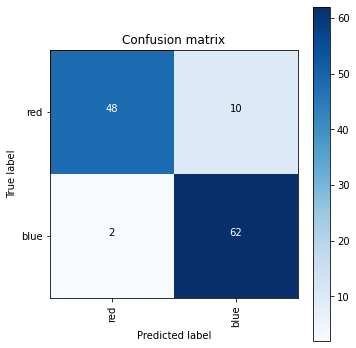

In [8]:
confusion_mtx = confusion_matrix(y_data, y_pred)
plot_confusion_matrix(confusion_mtx, ['red', 'blue'])

In [9]:
print(classification_report(y_data, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        58
           1       0.86      0.97      0.91        64

    accuracy                           0.90       122
   macro avg       0.91      0.90      0.90       122
weighted avg       0.91      0.90      0.90       122



### convert index file label to man red

In [10]:
rm -r -f Q6_Dataset

In [11]:
!unzip Q6_Dataset.zip

Archive:  Q6_Dataset.zip
   creating: Q6_Dataset/
   creating: Q6_Dataset/Images/
  inflating: Q6_Dataset/Images/1.jpg  
  inflating: Q6_Dataset/Images/c1.jpg  
  inflating: Q6_Dataset/Images/c10.jpg  
  inflating: Q6_Dataset/Images/c11.jpg  
  inflating: Q6_Dataset/Images/c12.jpg  
  inflating: Q6_Dataset/Images/c13.jpg  
  inflating: Q6_Dataset/Images/c14.jpg  
  inflating: Q6_Dataset/Images/c15.jpg  
  inflating: Q6_Dataset/Images/c16.jpg  
  inflating: Q6_Dataset/Images/c17.jpg  
  inflating: Q6_Dataset/Images/c18.jpg  
  inflating: Q6_Dataset/Images/c19.jpg  
  inflating: Q6_Dataset/Images/c2.jpg  
  inflating: Q6_Dataset/Images/c20.jpg  
  inflating: Q6_Dataset/Images/c21.jpg  
  inflating: Q6_Dataset/Images/c22.jpg  
  inflating: Q6_Dataset/Images/c23.jpg  
  inflating: Q6_Dataset/Images/c24.jpg  
  inflating: Q6_Dataset/Images/c25.jpg  
  inflating: Q6_Dataset/Images/c26.jpg  
  inflating: Q6_Dataset/Images/c27.jpg  
  inflating: Q6_Dataset/Images/c28.jpg  
  inflating: Q6_Data

### rename some file to man red

In [12]:
rename_map = {'1.jpg' : 'm66.jpg',
              'ManUtd-508878051576073641743_medium.jpg' : 'm65.jpg',
              'images.jpg' : 'm64.jpg',
              'index.jpg' : 'm67.jpg',
              }

for i in rename_map.keys():
  os.rename(base_path + i, base_path + rename_map[i])

### read dataset again when file names updated

In [13]:
x_data, y_data = read_dataset(base_path)

c18.jpg
1
[100.30676170676173, 99.31917631917632, 93.17457677457674]
m42.jpg
0
[60.077180273056534, 69.6492457111014, 95.05445209568916]
m9.jpg
0
[95.79878534448426, 88.44030266825956, 83.9925129430506]
c52.jpg
1
[125.87394724847921, 118.47599231119835, 115.98194716921309]
m27.jpg
0
[55.83084507882233, 58.78019203626026, 99.18927300558614]
m4.jpg
0
[73.55049603174608, 91.77755952380953, 108.52468253968257]
c21.jpg
1
[134.94046056556496, 107.88261146243484, 121.57805353378657]
m59.jpg
0
[44.53021771027479, 51.89808462545105, 83.14958163143919]
c30.jpg
1
[51.08191955396255, 47.85688968538429, 53.733671843886896]
c57.jpg
1
[75.06264422694358, 57.74148563698577, 65.60008355216038]
c56.jpg
1
[74.56966658709314, 64.54541656719987, 65.1199570303175]
m22.jpg
0
[47.16936475816368, 59.54842677459035, 127.53517438400183]
m64.jpg
0
[71.20783753768045, 77.44322148183396, 106.56697207678891]
m2.jpg
0
[62.116736626414934, 81.07474088368116, 124.06165078480917]
c44.jpg
1
[79.68913872556813, 120.215000

### prediction when index file label is man red

In [14]:
y_pred = pred(x_data, center_m, centre_c)

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_data, y_pred)*100))

The accuracy of the model is: 89.3%


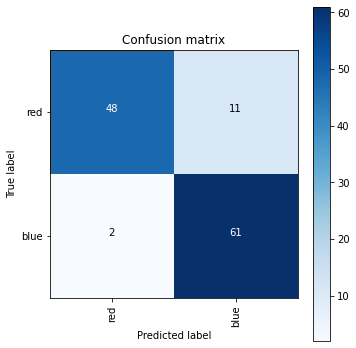

In [15]:
confusion_mtx = confusion_matrix(y_data, y_pred)
plot_confusion_matrix(confusion_mtx, ['red', 'blue'])

In [16]:
print(classification_report(y_data, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        59
           1       0.85      0.97      0.90        63

    accuracy                           0.89       122
   macro avg       0.90      0.89      0.89       122
weighted avg       0.90      0.89      0.89       122

